In [29]:
# 1. Imports
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [20]:
# 2️⃣ Ensure working directory is repo root
# Adjust this path to your repo root if needed
os.chdir("/Users/waheedkehinde/Desktop/fraud-detection-app")
print("Working directory set to:", os.getcwd())

# 3️⃣ Load dataset
csv_path = "data/raw/creditcard.csv"

# Check if CSV exists
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV not found at {csv_path}")

df = pd.read_csv(csv_path)
print("Dataset loaded successfully!")
print(df.shape)
df.head()

Working directory set to: /Users/waheedkehinde/Desktop/fraud-detection-app
Dataset loaded successfully!
(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Visualizations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

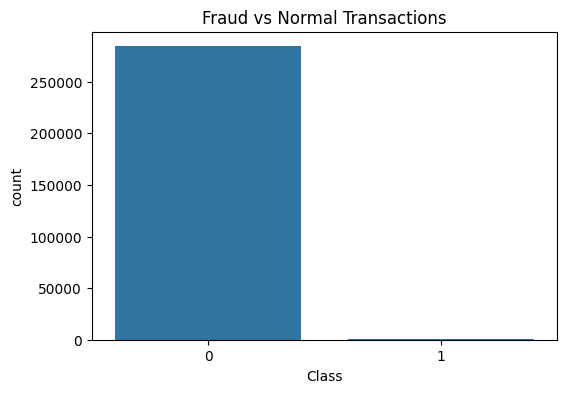

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [21]:
# -----------------------------
# 4️⃣ Quick overview
# -----------------------------
print(df.info())
print(df.describe())

# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df)
plt.title("Fraud vs Normal Transactions")
plt.show()

print("Class distribution:\n", df["Class"].value_counts())

# Visualizations

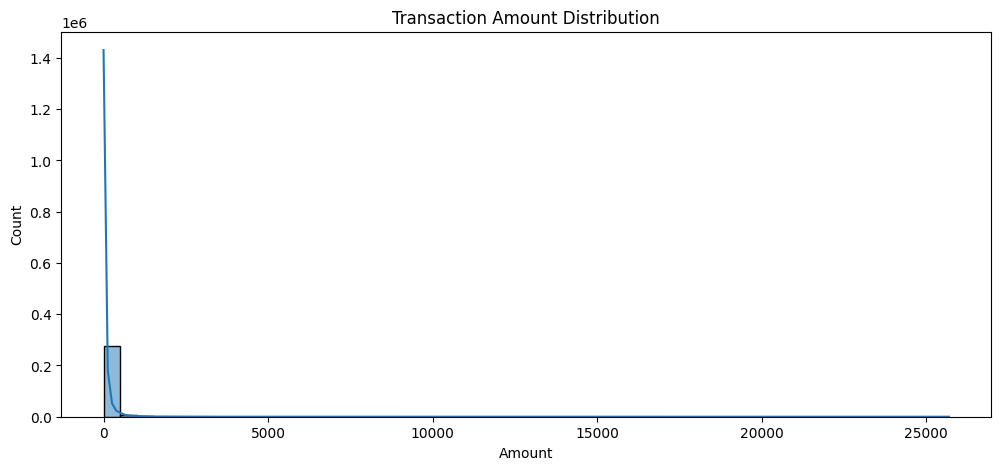

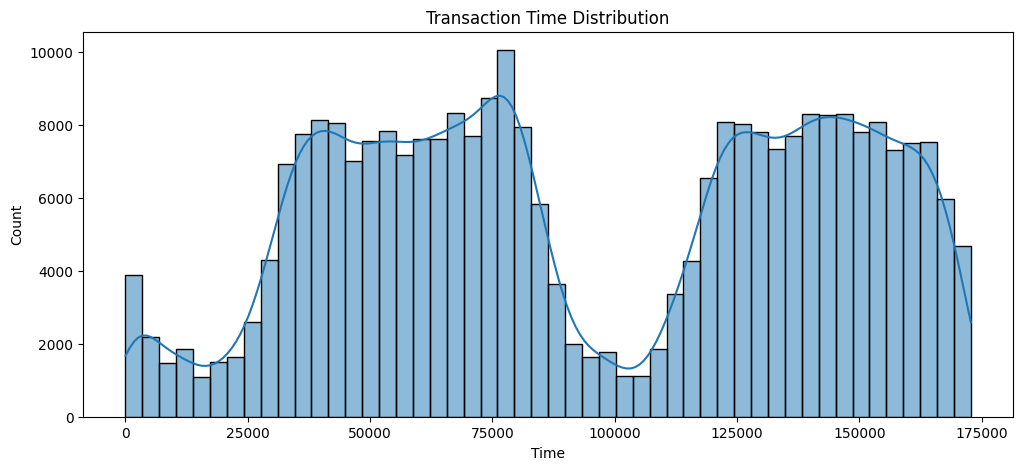

In [22]:
# -----------------------------
# 5️⃣ Transaction Amount & Time
# -----------------------------
plt.figure(figsize=(12,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title("Transaction Time Distribution")
plt.show()


# Feature correlations

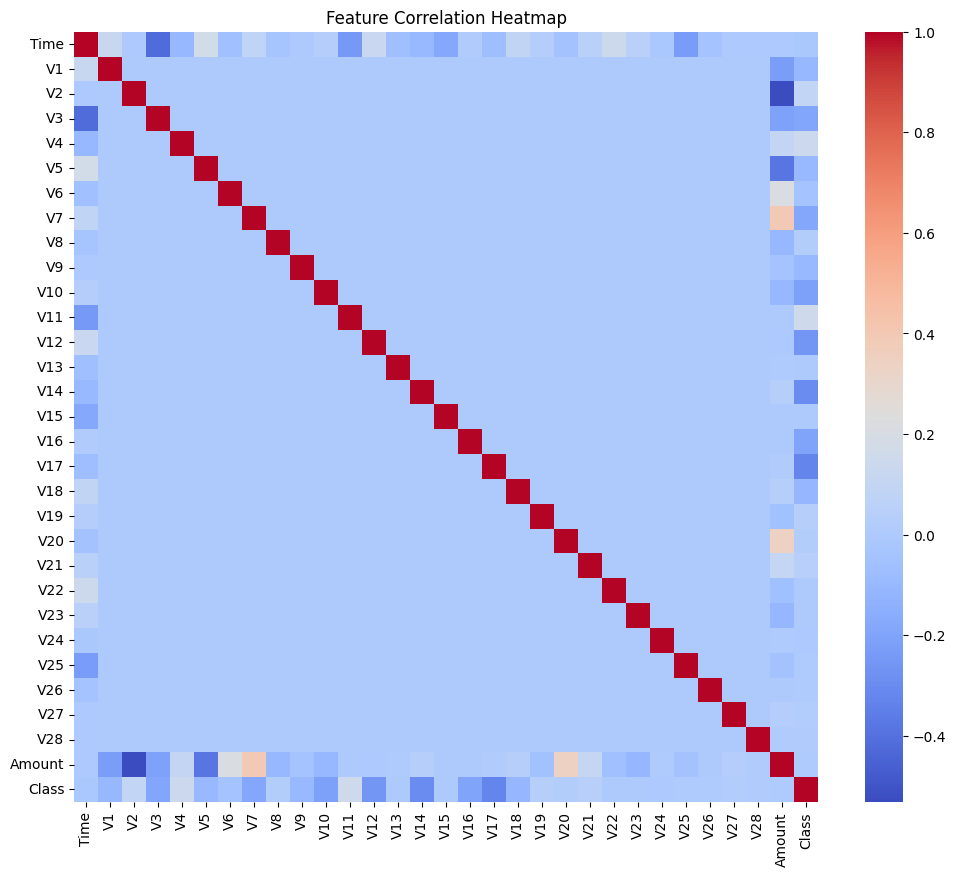

In [23]:
# -----------------------------
# 6️⃣ Feature correlations
# -----------------------------
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


# Train/Test Split

In [24]:
# -----------------------------
# 7️⃣ Train/Test split
# -----------------------------
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (227845, 30)
Test shape: (56962, 30)


# Scaling numeric features

In [26]:
# -----------------------------
#  Scale numeric features
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Handle class imbalance with SMOTE

In [30]:
# -----------------------------
#  Handle class imbalance with SMOTE
# -----------------------------
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_sm.value_counts())

/Users/waheedkehinde/Desktop/fraud-detection-app/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Before SMOTE:
 Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64


# rain a baseline model 

In [31]:
# -----------------------------
#  Train a baseline model (Logistic Regression)
# -----------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)

# Train on SMOTE-balanced training set
lr.fit(X_train_sm, y_train_sm)

# Predict probabilities on the original test set
y_probs = lr.predict_proba(X_test_scaled)[:, 1]  # Probability of fraud
y_pred = (y_probs >= 0.5).astype(int)           # Threshold = 0.5 initially


/Users/waheedkehinde/Desktop/fraud-detection-app/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/waheedkehinde/Desktop/fraud-detection-app/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/waheedkehinde/Desktop/fraud-detection-app/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/waheedkehinde/Desktop/fraud-detection-app/venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/waheedkehinde/Desktop/fraud-detection-app/venv/lib/python3.9/site-packages/sklearn/linear_mo

In [32]:
# -----------------------------
#  Evaluation
# -----------------------------
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion matrix (optional)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Classification Report:

              precision    recall  f1-score   support

           0     0.9999    0.9742    0.9869     56864
           1     0.0578    0.9184    0.1088        98

    accuracy                         0.9741     56962
   macro avg     0.5288    0.9463    0.5478     56962
weighted avg     0.9982    0.9741    0.9854     56962

ROC-AUC: 0.9708
Confusion Matrix:
 [[55397  1467]
 [    8    90]]


# Threshold tuning

In [33]:
# -----------------------------
# 12️⃣ Threshold tuning
# -----------------------------
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Define thresholds to test
thresholds = np.arange(0.01, 1.0, 0.05)

# Store metrics for each threshold
results = []

for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    
    precision_fraud = precision_score(y_test, y_pred_thresh, pos_label=1)
    recall_fraud = recall_score(y_test, y_pred_thresh, pos_label=1)
    f1_fraud = f1_score(y_test, y_pred_thresh, pos_label=1)
    
    results.append({
        "threshold": round(t, 2),
        "precision_fraud": round(precision_fraud, 4),
        "recall_fraud": round(recall_fraud, 4),
        "f1_fraud": round(f1_fraud, 4)
    })

# Convert to DataFrame for easy viewing
threshold_df = pd.DataFrame(results)
threshold_df


,threshold,precision_fraud,recall_fraud,f1_fraud
0,0.01,0.0027,0.9898,0.0055
1,0.06,0.0058,0.9490,0.0116
2,0.11,0.0090,0.9490,0.0178
3,0.16,0.0128,0.9388,0.0252
4,0.21,0.0172,0.9184,0.0338
5,0.26,0.0225,0.9184,0.0440
6,0.31,0.0289,0.9184,0.0560
7,0.36,0.0359,0.9184,0.0691
8,0.41,0.0432,0.9184,0.0825
9,0.46,0.0507,0.9184,0.0961


# Visualisation

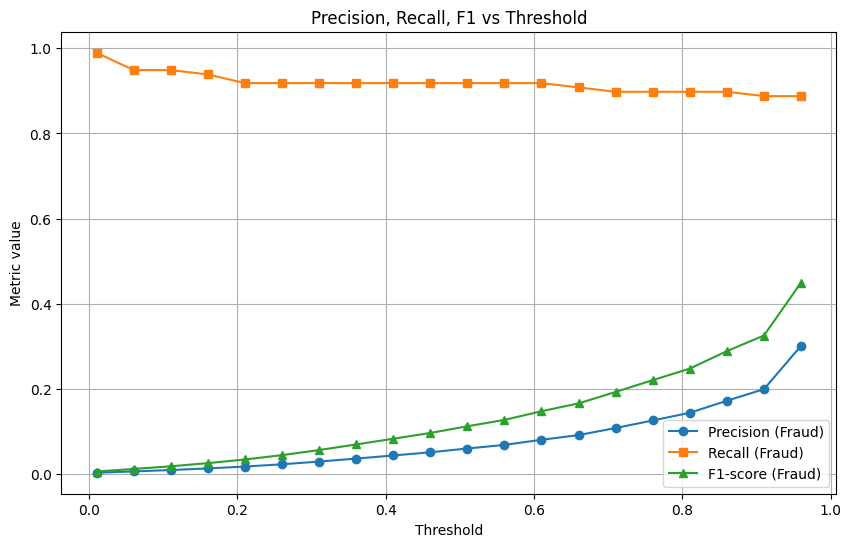

In [34]:
# -----------------------------
#  Plot precision, recall, F1 vs threshold
# -----------------------------
plt.figure(figsize=(10,6))

plt.plot(threshold_df["threshold"], threshold_df["precision_fraud"], marker='o', label="Precision (Fraud)")
plt.plot(threshold_df["threshold"], threshold_df["recall_fraud"], marker='s', label="Recall (Fraud)")
plt.plot(threshold_df["threshold"], threshold_df["f1_fraud"], marker='^', label="F1-score (Fraud)")

plt.title("Precision, Recall, F1 vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Metric value")
plt.grid(True)
plt.legend()
plt.show()


# Auto-select optimal threshold

In [35]:
# -----------------------------
#  Auto-select optimal threshold (max F1 for fraud)
# -----------------------------

# Find row with max F1
best_row = threshold_df.loc[threshold_df["f1_fraud"].idxmax()]
best_threshold = best_row["threshold"]

print(f"Optimal threshold based on max F1 for fraud: {best_threshold}")

# Apply threshold to predictions
y_pred_best = (y_probs >= best_threshold).astype(int)

# Evaluate metrics at optimal threshold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("\nClassification Report at Optimal Threshold:\n")
print(classification_report(y_test, y_pred_best, digits=4))

roc_auc_best = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC (unchanged): {roc_auc_best:.4f}")

cm_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix at Optimal Threshold:\n", cm_best)


Optimal threshold based on max F1 for fraud: 0.96

Classification Report at Optimal Threshold:

              precision    recall  f1-score   support

           0     0.9998    0.9964    0.9981     56864
           1     0.3010    0.8878    0.4496        98

    accuracy                         0.9963     56962
   macro avg     0.6504    0.9421    0.7239     56962
weighted avg     0.9986    0.9963    0.9972     56962

ROC-AUC (unchanged): 0.9708
Confusion Matrix at Optimal Threshold:
 [[56662   202]
 [   11    87]]


## Threshold Tuning & Optimal Threshold Selection

After training our baseline Logistic Regression model on SMOTE-balanced data, we explored how different classification thresholds affect the detection of fraudulent transactions. This is crucial because fraud cases are extremely rare, and default thresholds (0.5) often lead to many false positives or missed frauds.


Observation: As the threshold increases, precision rises while recall slightly decreases, reflecting the trade-off between false positives and catching fraud.

Optimal Threshold Selection

Using maximum F1-score for the fraud class, the optimal threshold is:

Optimal threshold = 0.96

Evaluation at Optimal Threshold

Interpretation: With the selected threshold, the model correctly identifies 87 of 98 fraud cases (recall ~88.8%) while improving precision to ~30%. This balance reduces false alarms while still detecting most fraudulent transactions.

